<a href="https://colab.research.google.com/github/Trevor-Parsons/DL-Semester-Project/blob/master/Flowers_Recognition_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Flower Recognition CNN 

Trevor Parsons

This network is designed to recognize images containing various types of flowers. The data set contains 4,323 total images, composed of dasiy, dandelion, rose, and tulip images. From the main data set, images were randomly splilt proportinally into training, validation, and testing folders that were then uploaded to google drive for use in Colab.



In [0]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras import layers, models
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Paths must be etablished from google drive to image data sets.

In [0]:
train_path = '/content/drive/My Drive/flowers/train'
valid_path = '/content/drive/My Drive/flowers/validate'
test_path = '/content/drive/My Drive/flowers/test'

Using the image paths, the ImageDataGenerator function is used to generate batches of training, validation, and testing data.

In [64]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size = (75, 75), 
                                                         classes=['daisy', 'dandelion', 'rose', 'sunflower', 'tulip'], 
                                                         batch_size = 34)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size = (75, 75), 
                                                         classes=['daisy', 'dandelion', 'rose', 'sunflower', 'tulip'], 
                                                         batch_size = 11)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size = (75, 75), 
                                                        classes=['daisy', 'dandelion', 'rose', 'sunflower', 'tulip'], 
                                                        batch_size = 12)



Found 3026 images belonging to 5 classes.
Found 649 images belonging to 5 classes.
Found 648 images belonging to 5 classes.


In [0]:
def plots(ims, figsize=(24, 12), rows = 7, interp = False, titles = None):
   if type(ims[0]) is np.ndarray:
      ims = np.array(ims).astype(np.uint8)
      if (ims.shape[-1] != 3):
        ims = ims.transpose((0, 2, 3, 1))
   
   f = plt.figure(figsize = figsize)
   cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
   for i in range(len(ims)):
      sp = f.add_subplot(rows, cols, i + 1)
      sp.axis('Off')
      if titles is not None:
        sp.set_title(titles[i], fontsize = 10)
      
      plt.imshow(ims[i], interpolation=None if interp else 'none')
    
 

In [0]:
imgs, labels = next(train_batches)

Visualization of some images in the training data set, with labes in array form above the image. (Note that arrays in the shape [daisy, dandelion, rose,  sunflower, tulip], where 1 is a positive labe for that picture.)

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


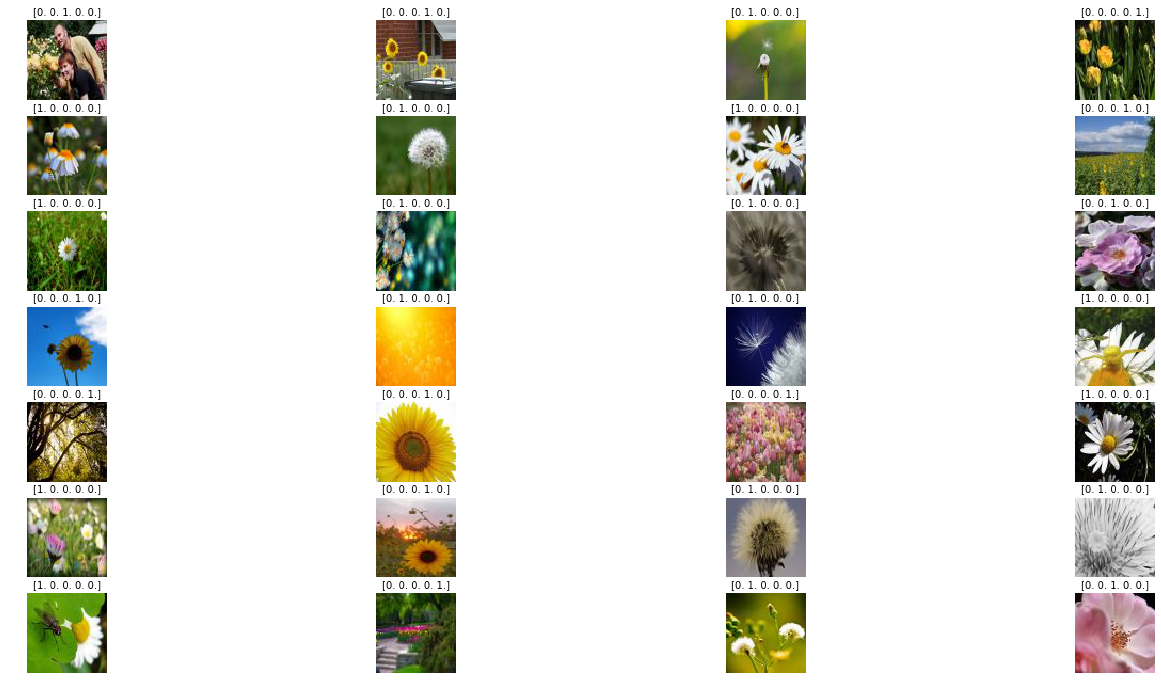

In [67]:
try:
  plots(imgs, titles = labels)
except:
  pass

All of the following models use sigmod activated convolutional layers, a softmax activated dense layer and a filter size of 3 x 3.

Building and training model with one convolutional layer:

In [68]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation = 'sigmoid', input_shape = (75, 75, 3)))
model1.add(layers.Flatten())
model1.add(layers.Dense(5, activation = 'softmax'))
model1.compile(optimizer = Adam(lr=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model1.summary()
history = model1.fit_generator(train_batches, steps_per_epoch = 178, validation_data = valid_batches, validation_steps = 59, epochs = 5, verbose = 1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 73, 73, 32)        896       
_________________________________________________________________
flatten_20 (Flatten)         (None, 170528)            0         
_________________________________________________________________
dense_20 (Dense)             (None, 5)                 852645    
Total params: 853,541
Trainable params: 853,541
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
178/178 [==============================] - 12s 68ms/step - loss: 13.1228 - acc: 0.1818 - val_loss: 13.1875 - val_acc: 0.1818
Epoch 2/5
178/178 [==============================] - 12s 65ms/step - loss: 13.2018 - acc: 0.1809 - val_loss: 13.1875 - val_acc: 0.1818
Epoch 3/5
178/178 [==============================] - 11s 61ms/step - loss: 13.1778 - acc: 0.1824 - val_loss: 13.1875 - val_acc: 0.

As can be seen from the graphs, this model was very unsuccessful. Running the model for more epochs was tested, but did not improve the training results.

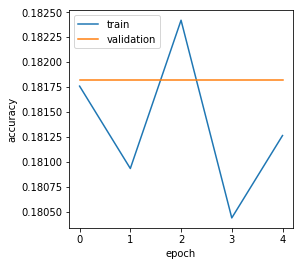

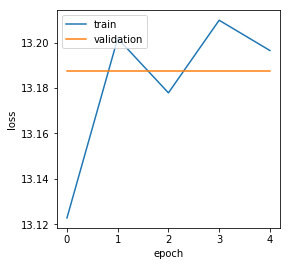

In [69]:
plt.figure(figsize=(4,4))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.figure(figsize=(4,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Building and training a model with three convolutional layers:

In [70]:
model3 = models.Sequential()
model3.add(layers.Conv2D(32, (3, 3), activation = 'sigmoid', input_shape = (75, 75, 3)))
model3.add(layers.Conv2D(64, (3, 3), activation = 'sigmoid'))
model3.add(layers.Conv2D(128, (3, 3), activation = 'sigmoid'))
model3.add(layers.Flatten())
model3.add(layers.Dense(5, activation = 'softmax'))
model3.compile(optimizer = Adam(lr=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model3.summary()
history = model3.fit_generator(train_batches, steps_per_epoch = 178, validation_data = valid_batches, validation_steps = 59, epochs = 5, verbose = 1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 73, 73, 32)        896       
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 69, 69, 128)       73856     
_________________________________________________________________
flatten_21 (Flatten)         (None, 609408)            0         
_________________________________________________________________
dense_21 (Dense)             (None, 5)                 3047045   
Total params: 3,140,293
Trainable params: 3,140,293
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
178/178 [==============================] - 14s 76ms/step - loss: 12.1318 - acc: 0.2411 - val_loss: 12.2438 - val_acc: 0.24

As can be seen from the graphs, this model was also very unsucessful. Running the model for more epochs was tested, but did not improve the training results.

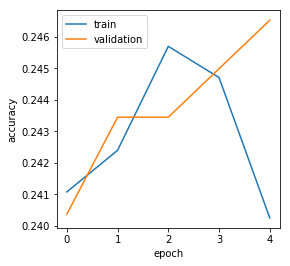

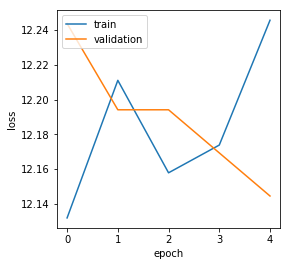

In [71]:
plt.figure(figsize=(4,4))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.figure(figsize=(4,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Building a model with 3 convolutional layers and uses maxpooling:

In [73]:
model4 = models.Sequential()
model4.add(layers.Conv2D(32, (3, 3), activation = 'sigmoid', input_shape = (75, 75, 3)))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(64, (3, 3), activation = 'sigmoid'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(128, (3, 3), activation = 'sigmoid'))
model4.add(layers.Flatten())
model4.add(layers.Dense(5, activation = 'softmax'))
model4.compile(optimizer = Adam(lr=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model4.summary()
history = model4.fit_generator(train_batches, steps_per_epoch = 178, validation_data = valid_batches, validation_steps = 59, epochs = 40, verbose = 1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 73, 73, 32)        896       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 15, 15, 128)       73856     
_________________________________________________________________
flatten_23 (Flatten)         (None, 28800)             0         
_________________________________________________________________
dense_23 (Dense)             (None, 5)                 144005    
Total para

As shown by the graphs, this model had much more practical viability. The base line validation accuracy for this network is 20%, andfor other networks trained on this data set were in the 60-70% range, so this model is not outpreforming experienced networks but is beating the baseline accuracy considerably. 

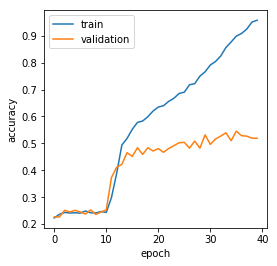

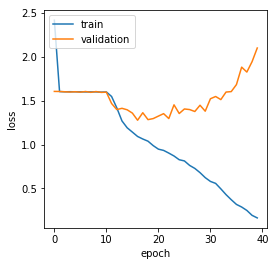

In [76]:
plt.figure(figsize=(4,4))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.figure(figsize=(4,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Accidental model that was fairly successful, used 32 fileters in the first convolutional layer and 4 in the second, included for only for discussion.

In [77]:
model0 = models.Sequential()
model0.add(layers.Conv2D(32, (3, 3), activation = 'sigmoid', input_shape = (75, 75, 3)))
model0.add(layers.Conv2D(4, (3, 3), activation = 'sigmoid'))
model0.add(layers.Flatten())
model0.add(layers.Dense(5, activation = 'softmax'))
model0.compile(optimizer = Adam(lr=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model0.summary()
history = model0.fit_generator(train_batches, steps_per_epoch = 178, validation_data = valid_batches, validation_steps = 59, epochs = 20, verbose = 1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_59 (Conv2D)           (None, 73, 73, 32)        896       
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 71, 71, 4)         1156      
_________________________________________________________________
flatten_24 (Flatten)         (None, 20164)             0         
_________________________________________________________________
dense_24 (Dense)             (None, 5)                 100825    
Total params: 102,877
Trainable params: 102,877
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
178/178 [==============================] - 12s 69ms/step - loss: 2.8484 - acc: 0.2298 - val_loss: 1.6017 - val_acc: 0.2527
Epoch 2/20
178/178 [==============================] - 11s 60ms/step - loss: 1.5993 - acc: 0.2363 - val_loss: 1.5942 - val_acc: 0.2388


In [0]:
plt.figure(figsize=(4,4))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.figure(figsize=(4,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Saving the model for future usage.

In [0]:
model4.save('FlowersCNN')